In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [2]:
data = pd.read_csv("C:/Users/RAMCHARAN/Downloads/data.csv")

In [6]:
#Data Preprocessing
# Drop ID column if exists
if 'Id' in data.columns:
    data.drop('Id', axis=1, inplace=True)

In [8]:

# Map diagnosis: M=1 (malignant), B=0 (benign)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Drop non-numeric columns if present
data = data.select_dtypes(include=[np.number])

# Split features & target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


In [9]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
print("\nMissing values in X_train:")
print(pd.DataFrame(X_train).isnull().sum())

print("\nMissing values in X_test:")
print(pd.DataFrame(X_test).isnull().sum())



Missing values in X_train:
id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32

In [13]:
X_train = pd.DataFrame(X_train).dropna()
X_test = pd.DataFrame(X_test).dropna()
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]


In [17]:
# Drop 'Unnamed: 32' if it exists — it's entirely NaN
if 'Unnamed: 32' in data.columns:
    data.drop('Unnamed: 32', axis=1, inplace=True)

# Drop ID column if exists
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)

# Convert diagnosis labels: M → 1, B → 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Confirm there are no non-numeric columns left (optional)
data = data.select_dtypes(include=[np.number])

# Split features and labels
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute any remaining missing values using mean (safe fallback)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# Split features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Reset indices for all arrays to keep alignment
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
# Load and clean dataset
data = pd.read_csv("C:/Users/RAMCHARAN/Downloads/data.csv")

#  Drop unnecessary columns
data.drop(columns=['Unnamed: 32'], errors='ignore', inplace=True)
data.drop(columns=['id'], errors='ignore', inplace=True)

#  Encode target column
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

#  Drop rows where target is NaN
data = data.dropna(subset=['diagnosis'])

#  Split features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Reset indices to keep alignment
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#  Impute missing values (if any)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



📊 Confusion Matrix:
[[70  1]
 [ 2 41]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


🔍 ROC AUC Score: 0.997


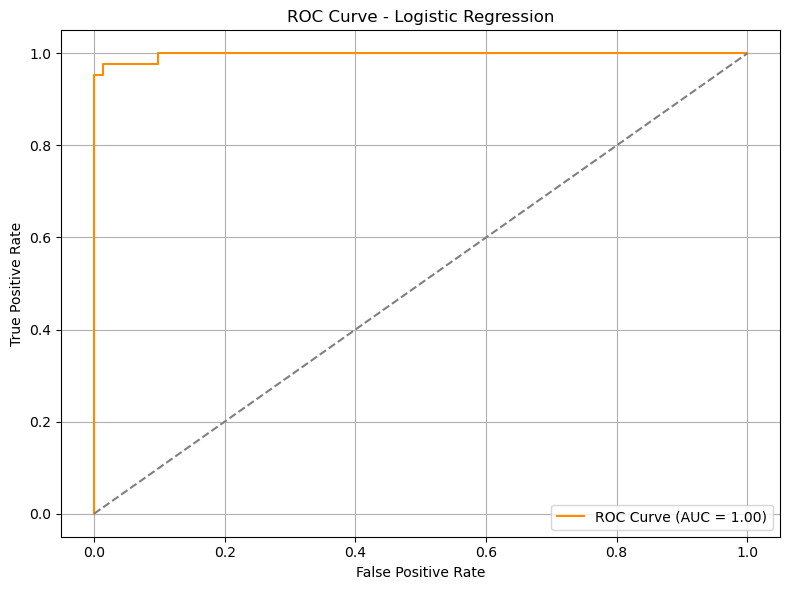

In [30]:
# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
# Predict class labels
y_pred = model.predict(X_test_scaled)

# Predict probabilities for ROC
y_prob = model.predict_proba(X_test_scaled)[:, 1]
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

roc_score = roc_auc_score(y_test, y_prob)
print(f"\n🔍 ROC AUC Score: {roc_score:.3f}")
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

